In [49]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Cargar archivos CSV de México
mexico_private_room = pd.read_csv("mexico_private_room.csv")

In [51]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
mexico_private_room['price'] = mexico_private_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_12588\1804745364.py:3: SyntaxWarning: invalid escape sequence '\$'
  mexico_private_room['price'] = mexico_private_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [52]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
   "name", "description", "neighborhood_overview", "host_name", "host_since",
  "host_location", "host_response_rate", "neighbourhood",
    "room_type", "bathrooms_text", "amenities", "host_neighbourhood",
   "neighbourhood_cleansed", "source", "host_response_time",
    "host_verifications", "host_has_profile_pic"
]

# Eliminar columnas del DataFrame
mexico_private_room = mexico_private_room.drop(columns=columnas_a_eliminar)

In [53]:
mexico_private_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           8693 non-null   float64
 1   host_id                      8693 non-null   int64  
 2   host_acceptance_rate         8693 non-null   int64  
 3   property_type                8693 non-null   object 
 4   price                        8693 non-null   float64
 5   latitude                     8693 non-null   float64
 6   longitude                    8693 non-null   float64
 7   accommodates                 8693 non-null   float64
 8   bathrooms                    8693 non-null   float64
 9   bedrooms                     8693 non-null   float64
 10  beds                         8693 non-null   float64
 11  minimum_nights               8693 non-null   int64  
 12  maximum_nights               8693 non-null   int64  
 13  minimum_minimum_ni

In [ ]:
#mexico_private_room.to_csv("mexico_private_room1.csv")

In [7]:
mexico_private_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8693 non-null   int64  
 1   id                           8693 non-null   float64
 2   host_id                      8693 non-null   int64  
 3   host_acceptance_rate         8693 non-null   int64  
 4   price                        8693 non-null   float64
 5   latitude                     8693 non-null   float64
 6   longitude                    8693 non-null   float64
 7   accommodates                 8693 non-null   float64
 8   bathrooms                    8693 non-null   float64
 9   bedrooms                     8693 non-null   float64
 10  beds                         8693 non-null   float64
 11  minimum_nights               8693 non-null   int64  
 12  maximum_nights               8693 non-null   int64  
 13  minimum_minimum_ni

mexico_entire_home     
PRICE Vs host_acceptance_rate

In [13]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_private_room[['host_acceptance_rate']]
Vars_Dep=mexico_private_room['price']

In [55]:
#Se define model como funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [15]:
#verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [16]:
#Ajustamos

#matrices=letra mayuscula
#vector=letra minusculka
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [17]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.81132437]),
 'rank_': 1,
 'singular_': array([2665.38938662]),
 'intercept_': 1231.8083062781682}

Modelo matemático:y=-2.81132437 *1231.8083062781682

In [74]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0002489123742499544

In [18]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_private_room[['host_acceptance_rate']])
y_pred

array([ 950.67586932, 1012.52500545,  950.67586932, ...,  950.67586932,
        950.67586932,  950.67586932])

In [19]:
#Insertamos la columna de predicciones en el Dataframe
mexico_private_room.insert(0, 'Predicciones', y_pred)
mexico_private_room

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
0,950.675869,0,1.316100e+05,647454,100,3633.0,19.354160,-99.164880,2.0,1.5,...,4.91,4.79,4.86,5.00,4.83,4.91,4.82,1.74,0,0
1,1012.525005,1,1.711090e+05,816295,78,335.0,19.396750,-99.175810,2.0,1.0,...,4.84,4.87,4.61,4.98,4.95,4.97,4.81,0.84,0,1
2,950.675869,2,1.013504e+06,1664327,100,384.0,19.340340,-99.183450,1.0,1.5,...,4.96,4.90,4.92,4.92,4.94,4.92,4.89,0.54,0,1
3,950.675869,3,1.051636e+06,22366411,100,947.0,19.405920,-99.169100,1.0,1.0,...,4.83,4.60,4.97,4.97,4.77,4.93,4.73,0.22,0,0
4,1020.958979,4,1.066945e+06,5870021,75,1200.0,19.354450,-99.162510,2.0,1.0,...,4.93,4.94,4.97,4.96,4.91,4.97,4.94,1.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,950.675869,8688,1.250000e+18,546574784,100,262.0,19.400000,-99.137099,2.0,2.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0
8689,950.675869,8689,1.250000e+18,67472234,100,488.0,19.387329,-99.200000,4.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1
8690,950.675869,8690,1.250000e+18,596009321,100,2800.0,19.432687,-99.197736,2.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0
8691,950.675869,8691,1.250000e+18,596009321,100,2700.0,19.432687,-99.197736,2.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

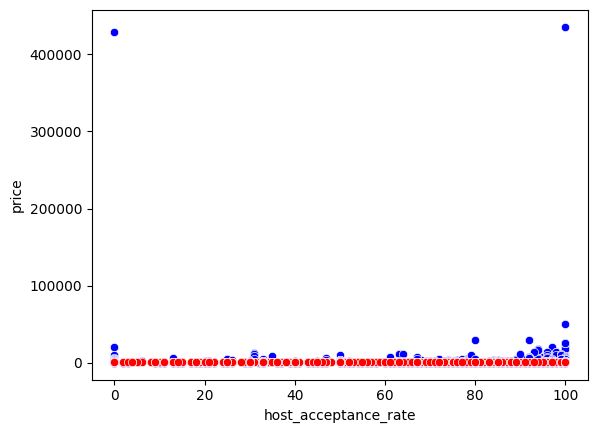

In [20]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=mexico_private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=mexico_private_room)

In [21]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00014442639886436126

In [22]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.01201775348658647

In [81]:
#sns.pairplot(mexico_entire_home)

In [23]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_private_room.corr()
Corr_Factors

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
Predicciones,1.000000,-0.054592,-0.037992,-0.071653,-1.000000,0.012018,-0.045940,0.030873,-0.071861,0.028578,...,0.071969,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,-0.146332,-0.000970,-0.248486
Unnamed: 0,-0.054592,1.000000,0.935519,0.461062,0.054592,-0.007592,0.123097,0.017907,0.073505,-0.057511,...,0.076235,-0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.223907,-0.010531
id,-0.037992,0.935519,1.000000,0.414733,0.037992,-0.005643,0.101712,0.001985,0.069465,-0.055802,...,0.095550,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.202706,-0.011514
host_id,-0.071653,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,-0.010091,...,-0.018256,-0.083707,-0.002756,-0.020969,-0.061844,-0.029476,-0.020455,0.120174,0.108508,-0.085795
host_acceptance_rate,-1.000000,0.054592,0.037992,0.071653,1.000000,-0.012018,0.045940,-0.030873,0.071861,-0.028578,...,-0.071969,-0.025681,-0.072582,-0.095276,-0.017431,-0.055797,-0.079178,0.146332,0.000970,0.248486
price,0.012018,-0.007592,-0.005643,0.004901,-0.012018,1.000000,-0.010086,-0.010823,0.018599,-0.011392,...,-0.001622,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,-0.011681,-0.013786,-0.020353
latitude,-0.045940,0.123097,0.101712,0.113206,0.045940,-0.010086,1.000000,0.067917,0.067812,-0.032024,...,-0.072841,-0.085069,-0.080734,-0.044939,-0.056565,-0.053265,-0.051090,0.106904,0.020800,-0.026725
longitude,0.030873,0.017907,0.001985,0.017153,-0.030873,-0.010823,0.067917,1.000000,-0.008618,-0.018909,...,-0.032363,-0.022928,-0.044392,-0.016458,0.001300,-0.010071,-0.024784,0.001281,0.000595,-0.006967
accommodates,-0.071861,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,-0.008618,1.000000,0.084597,...,-0.045440,-0.060714,-0.026843,-0.047046,-0.045523,-0.014735,-0.034789,0.061394,0.027081,-0.004356
bathrooms,0.028578,-0.057511,-0.055802,-0.010091,-0.028578,-0.011392,-0.032024,-0.018909,0.084597,1.000000,...,-0.020672,-0.034109,-0.019639,-0.009257,-0.011923,0.002270,-0.026342,-0.055402,-0.010986,-0.089928


In [24]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
Predicciones,1.000000,0.054592,0.037992,0.071653,1.000000,0.012018,0.045940,0.030873,0.071861,0.028578,...,0.071969,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,0.146332,0.000970,0.248486
Unnamed: 0,0.054592,1.000000,0.935519,0.461062,0.054592,0.007592,0.123097,0.017907,0.073505,0.057511,...,0.076235,0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.223907,0.010531
id,0.037992,0.935519,1.000000,0.414733,0.037992,0.005643,0.101712,0.001985,0.069465,0.055802,...,0.095550,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.202706,0.011514
host_id,0.071653,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,0.010091,...,0.018256,0.083707,0.002756,0.020969,0.061844,0.029476,0.020455,0.120174,0.108508,0.085795
host_acceptance_rate,1.000000,0.054592,0.037992,0.071653,1.000000,0.012018,0.045940,0.030873,0.071861,0.028578,...,0.071969,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,0.146332,0.000970,0.248486
price,0.012018,0.007592,0.005643,0.004901,0.012018,1.000000,0.010086,0.010823,0.018599,0.011392,...,0.001622,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,0.011681,0.013786,0.020353
latitude,0.045940,0.123097,0.101712,0.113206,0.045940,0.010086,1.000000,0.067917,0.067812,0.032024,...,0.072841,0.085069,0.080734,0.044939,0.056565,0.053265,0.051090,0.106904,0.020800,0.026725
longitude,0.030873,0.017907,0.001985,0.017153,0.030873,0.010823,0.067917,1.000000,0.008618,0.018909,...,0.032363,0.022928,0.044392,0.016458,0.001300,0.010071,0.024784,0.001281,0.000595,0.006967
accommodates,0.071861,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,0.008618,1.000000,0.084597,...,0.045440,0.060714,0.026843,0.047046,0.045523,0.014735,0.034789,0.061394,0.027081,0.004356
bathrooms,0.028578,0.057511,0.055802,0.010091,0.028578,0.011392,0.032024,0.018909,0.084597,1.000000,...,0.020672,0.034109,0.019639,0.009257,0.011923,0.002270,0.026342,0.055402,0.010986,0.089928


<Axes: >

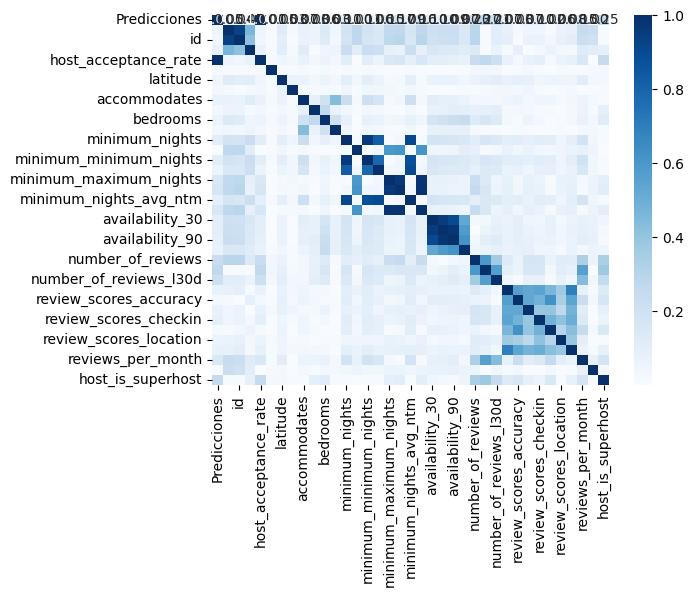

In [25]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_is_superhost”

In [31]:
mexico_private_room1 = pd.read_csv("mexico_private_room1.csv")

In [32]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]

Vars_Indep=mexico_private_room1[['host_is_superhost']]
Vars_Dep=mexico_private_room1['price']

In [33]:
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-302.68737779]),
 'rank_': 1,
 'singular_': array([41.92558581]),
 'intercept_': 1080.4142788538466}

Modelo matemático:y=--302.68737779 * 1080.4142788538466

In [34]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.00041423829083953034

In [ ]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=1080.4142788538466[['host_is_superhost']])
y_pred

array([1855.25953003, 1704.28633796, 1704.28633796, ..., 1855.25953003,
       1855.25953003, 1704.28633796])

In [35]:
#Insertamos la columna de predicciones en el Dataframe
mexico_private_room1.insert(0, 'Predicciones', y_pred)
mexico_private_room1

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
0,950.675869,0,1.316100e+05,647454,100,3633.0,19.354160,-99.164880,2.0,1.5,...,4.91,4.79,4.86,5.00,4.83,4.91,4.82,1.74,0,0
1,1012.525005,1,1.711090e+05,816295,78,335.0,19.396750,-99.175810,2.0,1.0,...,4.84,4.87,4.61,4.98,4.95,4.97,4.81,0.84,0,1
2,950.675869,2,1.013504e+06,1664327,100,384.0,19.340340,-99.183450,1.0,1.5,...,4.96,4.90,4.92,4.92,4.94,4.92,4.89,0.54,0,1
3,950.675869,3,1.051636e+06,22366411,100,947.0,19.405920,-99.169100,1.0,1.0,...,4.83,4.60,4.97,4.97,4.77,4.93,4.73,0.22,0,0
4,1020.958979,4,1.066945e+06,5870021,75,1200.0,19.354450,-99.162510,2.0,1.0,...,4.93,4.94,4.97,4.96,4.91,4.97,4.94,1.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,950.675869,8688,1.250000e+18,546574784,100,262.0,19.400000,-99.137099,2.0,2.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0
8689,950.675869,8689,1.250000e+18,67472234,100,488.0,19.387329,-99.200000,4.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1
8690,950.675869,8690,1.250000e+18,596009321,100,2800.0,19.432687,-99.197736,2.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0
8691,950.675869,8691,1.250000e+18,596009321,100,2700.0,19.432687,-99.197736,2.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0


<Axes: xlabel='host_is_superhost', ylabel='price'>

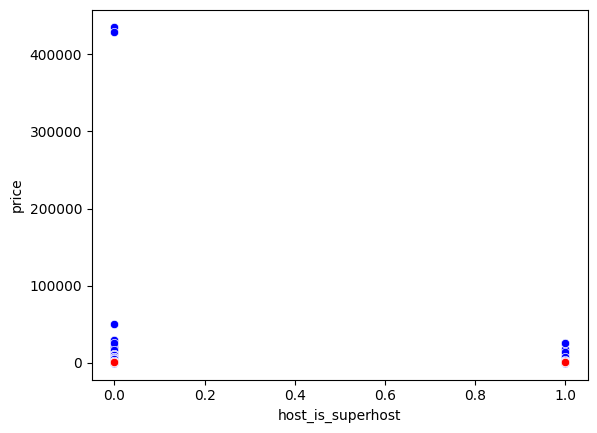

In [36]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=mexico_private_room1)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=mexico_private_room1)

In [37]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00041423829083953034

In [38]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.020352844784931916

In [39]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_private_room1.corr()
Corr_Factors

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
Predicciones,1.000000,-0.054592,-0.037992,-0.071653,-1.000000,0.012018,-0.045940,0.030873,-0.071861,0.028578,...,0.071969,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,-0.146332,-0.000970,-0.248486
Unnamed: 0,-0.054592,1.000000,0.935519,0.461062,0.054592,-0.007592,0.123097,0.017907,0.073505,-0.057511,...,0.076235,-0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.223907,-0.010531
id,-0.037992,0.935519,1.000000,0.414733,0.037992,-0.005643,0.101712,0.001985,0.069465,-0.055802,...,0.095550,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.202706,-0.011514
host_id,-0.071653,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,-0.010091,...,-0.018256,-0.083707,-0.002756,-0.020969,-0.061844,-0.029476,-0.020455,0.120174,0.108508,-0.085795
host_acceptance_rate,-1.000000,0.054592,0.037992,0.071653,1.000000,-0.012018,0.045940,-0.030873,0.071861,-0.028578,...,-0.071969,-0.025681,-0.072582,-0.095276,-0.017431,-0.055797,-0.079178,0.146332,0.000970,0.248486
price,0.012018,-0.007592,-0.005643,0.004901,-0.012018,1.000000,-0.010086,-0.010823,0.018599,-0.011392,...,-0.001622,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,-0.011681,-0.013786,-0.020353
latitude,-0.045940,0.123097,0.101712,0.113206,0.045940,-0.010086,1.000000,0.067917,0.067812,-0.032024,...,-0.072841,-0.085069,-0.080734,-0.044939,-0.056565,-0.053265,-0.051090,0.106904,0.020800,-0.026725
longitude,0.030873,0.017907,0.001985,0.017153,-0.030873,-0.010823,0.067917,1.000000,-0.008618,-0.018909,...,-0.032363,-0.022928,-0.044392,-0.016458,0.001300,-0.010071,-0.024784,0.001281,0.000595,-0.006967
accommodates,-0.071861,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,-0.008618,1.000000,0.084597,...,-0.045440,-0.060714,-0.026843,-0.047046,-0.045523,-0.014735,-0.034789,0.061394,0.027081,-0.004356
bathrooms,0.028578,-0.057511,-0.055802,-0.010091,-0.028578,-0.011392,-0.032024,-0.018909,0.084597,1.000000,...,-0.020672,-0.034109,-0.019639,-0.009257,-0.011923,0.002270,-0.026342,-0.055402,-0.010986,-0.089928


In [40]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
Predicciones,1.000000,0.054592,0.037992,0.071653,1.000000,0.012018,0.045940,0.030873,0.071861,0.028578,...,0.071969,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,0.146332,0.000970,0.248486
Unnamed: 0,0.054592,1.000000,0.935519,0.461062,0.054592,0.007592,0.123097,0.017907,0.073505,0.057511,...,0.076235,0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.223907,0.010531
id,0.037992,0.935519,1.000000,0.414733,0.037992,0.005643,0.101712,0.001985,0.069465,0.055802,...,0.095550,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.202706,0.011514
host_id,0.071653,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,0.010091,...,0.018256,0.083707,0.002756,0.020969,0.061844,0.029476,0.020455,0.120174,0.108508,0.085795
host_acceptance_rate,1.000000,0.054592,0.037992,0.071653,1.000000,0.012018,0.045940,0.030873,0.071861,0.028578,...,0.071969,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,0.146332,0.000970,0.248486
price,0.012018,0.007592,0.005643,0.004901,0.012018,1.000000,0.010086,0.010823,0.018599,0.011392,...,0.001622,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,0.011681,0.013786,0.020353
latitude,0.045940,0.123097,0.101712,0.113206,0.045940,0.010086,1.000000,0.067917,0.067812,0.032024,...,0.072841,0.085069,0.080734,0.044939,0.056565,0.053265,0.051090,0.106904,0.020800,0.026725
longitude,0.030873,0.017907,0.001985,0.017153,0.030873,0.010823,0.067917,1.000000,0.008618,0.018909,...,0.032363,0.022928,0.044392,0.016458,0.001300,0.010071,0.024784,0.001281,0.000595,0.006967
accommodates,0.071861,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,0.008618,1.000000,0.084597,...,0.045440,0.060714,0.026843,0.047046,0.045523,0.014735,0.034789,0.061394,0.027081,0.004356
bathrooms,0.028578,0.057511,0.055802,0.010091,0.028578,0.011392,0.032024,0.018909,0.084597,1.000000,...,0.020672,0.034109,0.019639,0.009257,0.011923,0.002270,0.026342,0.055402,0.010986,0.089928


<Axes: >

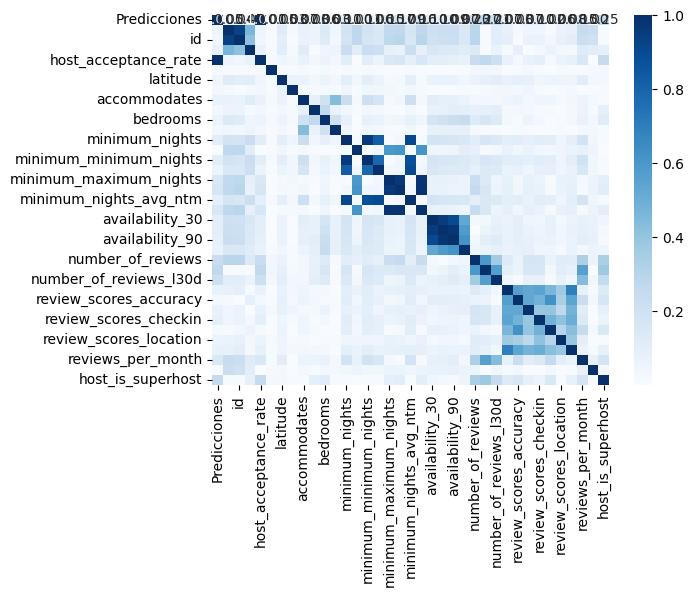

In [41]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“accommodates vs bathrooms” 


In [55]:
mexico_private_room2 = pd.read_csv("mexico_private_room1.csv")

In [56]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_private_room2[['bathrooms']]
Vars_Dep=mexico_private_room2['accommodates']

In [57]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.18025593]),
 'rank_': 1,
 'singular_': array([38.36980142]),
 'intercept_': 1.711857170728485}

Modelo matemático:y=0.18025593 * 1.711857170728485

In [58]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.00715666467732845

In [59]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_private_room2[['bathrooms']])
y_pred

array([1.98224107, 1.8921131 , 1.98224107, ..., 1.8921131 , 1.8921131 ,
       1.8921131 ])

In [60]:
#Insertamos la columna de predicciones en el Dataframe
mexico_private_room2.insert(0, 'Predicciones', y_pred)
mexico_private_room2


,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
0,1.982241,0,1.316100e+05,647454,100,3633.0,19.354160,-99.164880,2.0,1.5,...,4.91,4.79,4.86,5.00,4.83,4.91,4.82,1.74,0,0
1,1.892113,1,1.711090e+05,816295,78,335.0,19.396750,-99.175810,2.0,1.0,...,4.84,4.87,4.61,4.98,4.95,4.97,4.81,0.84,0,1
2,1.982241,2,1.013504e+06,1664327,100,384.0,19.340340,-99.183450,1.0,1.5,...,4.96,4.90,4.92,4.92,4.94,4.92,4.89,0.54,0,1
3,1.892113,3,1.051636e+06,22366411,100,947.0,19.405920,-99.169100,1.0,1.0,...,4.83,4.60,4.97,4.97,4.77,4.93,4.73,0.22,0,0
4,1.892113,4,1.066945e+06,5870021,75,1200.0,19.354450,-99.162510,2.0,1.0,...,4.93,4.94,4.97,4.96,4.91,4.97,4.94,1.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,2.072369,8688,1.250000e+18,546574784,100,262.0,19.400000,-99.137099,2.0,2.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0
8689,1.892113,8689,1.250000e+18,67472234,100,488.0,19.387329,-99.200000,4.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1
8690,1.892113,8690,1.250000e+18,596009321,100,2800.0,19.432687,-99.197736,2.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0
8691,1.892113,8691,1.250000e+18,596009321,100,2700.0,19.432687,-99.197736,2.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0


<Axes: xlabel='bathrooms', ylabel='accommodates'>

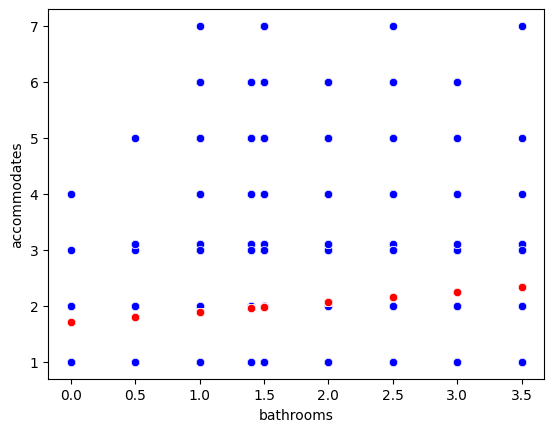

In [61]:

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=mexico_private_room2)
sns.scatterplot(x='bathrooms', y='Predicciones', color="red", data=mexico_private_room2)


In [48]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00715666467732845

In [49]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.08459707251039157

In [52]:

#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_private_room2.corr()
Corr_Factors

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
Predicciones,1.000000,-0.057511,-0.055802,-0.010091,-0.028578,-0.011392,-0.032024,-0.018909,0.084597,1.000000,...,-0.020672,-0.034109,-0.019639,-0.009257,-0.011923,0.002270,-0.026342,-0.055402,-0.010986,-0.089928
Unnamed: 0,-0.057511,1.000000,0.935519,0.461062,0.054592,-0.007592,0.123097,0.017907,0.073505,-0.057511,...,0.076235,-0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.223907,-0.010531
id,-0.055802,0.935519,1.000000,0.414733,0.037992,-0.005643,0.101712,0.001985,0.069465,-0.055802,...,0.095550,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.202706,-0.011514
host_id,-0.010091,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,-0.010091,...,-0.018256,-0.083707,-0.002756,-0.020969,-0.061844,-0.029476,-0.020455,0.120174,0.108508,-0.085795
host_acceptance_rate,-0.028578,0.054592,0.037992,0.071653,1.000000,-0.012018,0.045940,-0.030873,0.071861,-0.028578,...,-0.071969,-0.025681,-0.072582,-0.095276,-0.017431,-0.055797,-0.079178,0.146332,0.000970,0.248486
price,-0.011392,-0.007592,-0.005643,0.004901,-0.012018,1.000000,-0.010086,-0.010823,0.018599,-0.011392,...,-0.001622,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,-0.011681,-0.013786,-0.020353
latitude,-0.032024,0.123097,0.101712,0.113206,0.045940,-0.010086,1.000000,0.067917,0.067812,-0.032024,...,-0.072841,-0.085069,-0.080734,-0.044939,-0.056565,-0.053265,-0.051090,0.106904,0.020800,-0.026725
longitude,-0.018909,0.017907,0.001985,0.017153,-0.030873,-0.010823,0.067917,1.000000,-0.008618,-0.018909,...,-0.032363,-0.022928,-0.044392,-0.016458,0.001300,-0.010071,-0.024784,0.001281,0.000595,-0.006967
accommodates,0.084597,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,-0.008618,1.000000,0.084597,...,-0.045440,-0.060714,-0.026843,-0.047046,-0.045523,-0.014735,-0.034789,0.061394,0.027081,-0.004356
bathrooms,1.000000,-0.057511,-0.055802,-0.010091,-0.028578,-0.011392,-0.032024,-0.018909,0.084597,1.000000,...,-0.020672,-0.034109,-0.019639,-0.009257,-0.011923,0.002270,-0.026342,-0.055402,-0.010986,-0.089928


In [53]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
Predicciones,1.000000,0.057511,0.055802,0.010091,0.028578,0.011392,0.032024,0.018909,0.084597,1.000000,...,0.020672,0.034109,0.019639,0.009257,0.011923,0.002270,0.026342,0.055402,0.010986,0.089928
Unnamed: 0,0.057511,1.000000,0.935519,0.461062,0.054592,0.007592,0.123097,0.017907,0.073505,0.057511,...,0.076235,0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.223907,0.010531
id,0.055802,0.935519,1.000000,0.414733,0.037992,0.005643,0.101712,0.001985,0.069465,0.055802,...,0.095550,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.202706,0.011514
host_id,0.010091,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,0.010091,...,0.018256,0.083707,0.002756,0.020969,0.061844,0.029476,0.020455,0.120174,0.108508,0.085795
host_acceptance_rate,0.028578,0.054592,0.037992,0.071653,1.000000,0.012018,0.045940,0.030873,0.071861,0.028578,...,0.071969,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,0.146332,0.000970,0.248486
price,0.011392,0.007592,0.005643,0.004901,0.012018,1.000000,0.010086,0.010823,0.018599,0.011392,...,0.001622,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,0.011681,0.013786,0.020353
latitude,0.032024,0.123097,0.101712,0.113206,0.045940,0.010086,1.000000,0.067917,0.067812,0.032024,...,0.072841,0.085069,0.080734,0.044939,0.056565,0.053265,0.051090,0.106904,0.020800,0.026725
longitude,0.018909,0.017907,0.001985,0.017153,0.030873,0.010823,0.067917,1.000000,0.008618,0.018909,...,0.032363,0.022928,0.044392,0.016458,0.001300,0.010071,0.024784,0.001281,0.000595,0.006967
accommodates,0.084597,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,0.008618,1.000000,0.084597,...,0.045440,0.060714,0.026843,0.047046,0.045523,0.014735,0.034789,0.061394,0.027081,0.004356
bathrooms,1.000000,0.057511,0.055802,0.010091,0.028578,0.011392,0.032024,0.018909,0.084597,1.000000,...,0.020672,0.034109,0.019639,0.009257,0.011923,0.002270,0.026342,0.055402,0.010986,0.089928


<Axes: >

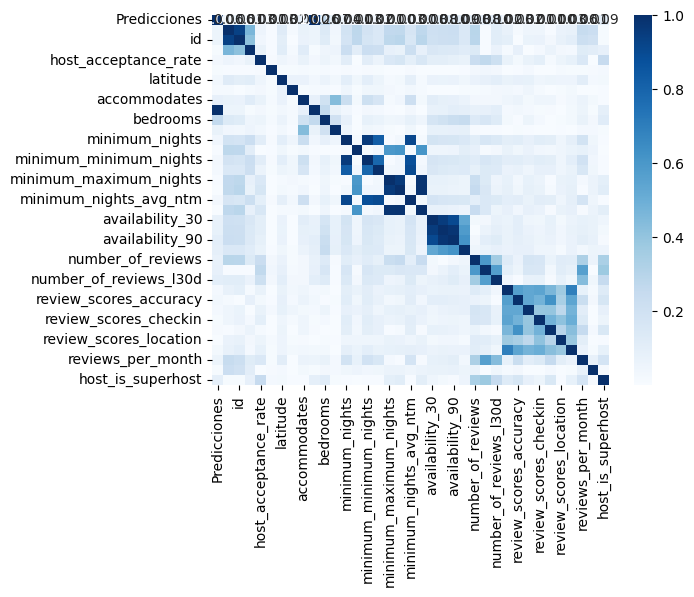

In [54]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

price vs review_scores_cleanliness

In [64]:
mexico_private_room3 = pd.read_csv("mexico_private_room1.csv")

In [71]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_private_room3[['review_scores_cleanliness']]
Vars_Dep=mexico_private_room3['price']


In [72]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1089.31289212]),
 'rank_': 1,
 'singular_': array([12.45726752]),
 'intercept_': -4279.800867563328}

Modelo matemático:y=1089.31289212 * -4279.800867563328

In [73]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.00047364636541114

In [74]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_private_room3[['review_scores_cleanliness']])
y_pred

array([1014.25978813,  741.9315651 , 1079.61856166, ..., 1014.25978813,
       1014.25978813, 1014.25978813])

In [75]:
#Insertamos la columna de predicciones en el Dataframe
mexico_private_room3.insert(0, 'Predicciones', y_pred)
mexico_private_room3

,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable,host_is_superhost
0,1014.259788,0,1.316100e+05,647454,100,3633.0,19.354160,-99.164880,2.0,1.5,...,4.91,4.79,4.86,5.00,4.83,4.91,4.82,1.74,0,0
1,741.931565,1,1.711090e+05,816295,78,335.0,19.396750,-99.175810,2.0,1.0,...,4.84,4.87,4.61,4.98,4.95,4.97,4.81,0.84,0,1
2,1079.618562,2,1.013504e+06,1664327,100,384.0,19.340340,-99.183450,1.0,1.5,...,4.96,4.90,4.92,4.92,4.94,4.92,4.89,0.54,0,1
3,1134.084206,3,1.051636e+06,22366411,100,947.0,19.405920,-99.169100,1.0,1.0,...,4.83,4.60,4.97,4.97,4.77,4.93,4.73,0.22,0,0
4,1134.084206,4,1.066945e+06,5870021,75,1200.0,19.354450,-99.162510,2.0,1.0,...,4.93,4.94,4.97,4.96,4.91,4.97,4.94,1.15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1014.259788,8688,1.250000e+18,546574784,100,262.0,19.400000,-99.137099,2.0,2.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0
8689,1014.259788,8689,1.250000e+18,67472234,100,488.0,19.387329,-99.200000,4.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1
8690,1014.259788,8690,1.250000e+18,596009321,100,2800.0,19.432687,-99.197736,2.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0
8691,1014.259788,8691,1.250000e+18,596009321,100,2700.0,19.432687,-99.197736,2.0,1.0,...,5.00,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,0


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

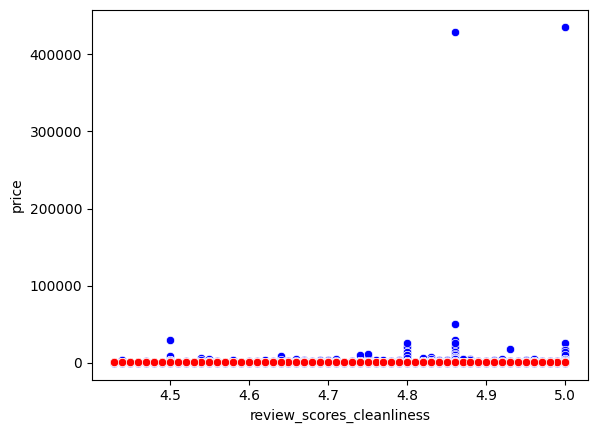

In [76]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=mexico_private_room3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=mexico_private_room3)

In [77]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.00047364636541114

In [78]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.021763418054412776

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_private_room3.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

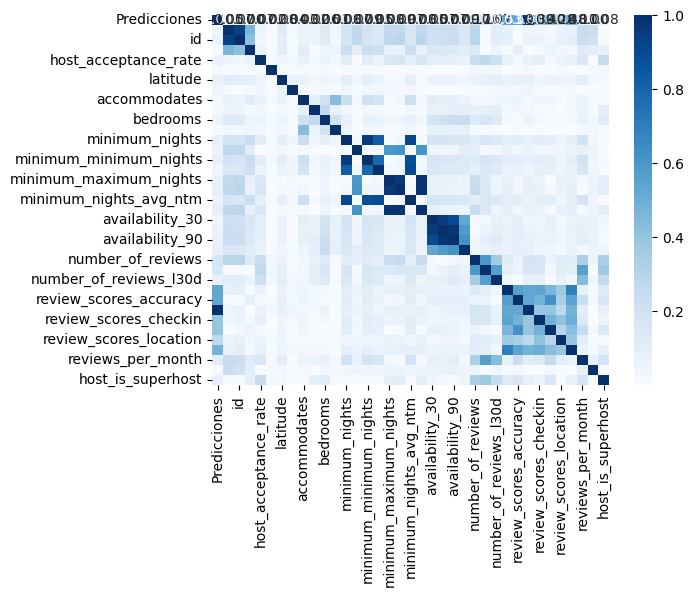

In [82]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_identity_verified”


In [17]:
mexico_private_room4 = pd.read_csv("mexico_private_room1.csv")

In [18]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_private_room4[['host_identity_verified']]
Vars_Dep=mexico_private_room4['price']


In [23]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([85.5190395]),
 'rank_': 1,
 'singular_': array([20.85100221]),
 'intercept_': 914.2418300653582}

Modelo matemático:y=85.5190395 * 914.2418300653582


In [24]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)


8.178672869063597e-06

In [25]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_private_room4[['host_identity_verified']])
y_pred


array([999.76086957, 999.76086957, 999.76086957, ..., 999.76086957,
       999.76086957, 999.76086957])

In [26]:
#Insertamos la columna de predicciones en el Dataframe
mexico_private_room4.insert(0, 'Predicciones', y_pred)
mexico_private_room4


,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_identity_verified,instant_bookable,host_is_superhost
0,999.76087,0,1.316100e+05,647454,100,3633.0,19.354160,-99.164880,2.0,1.5,...,4.79,4.86,5.00,4.83,4.91,4.82,1.74,1,0,0
1,999.76087,1,1.711090e+05,816295,78,335.0,19.396750,-99.175810,2.0,1.0,...,4.87,4.61,4.98,4.95,4.97,4.81,0.84,1,0,1
2,999.76087,2,1.013504e+06,1664327,100,384.0,19.340340,-99.183450,1.0,1.5,...,4.90,4.92,4.92,4.94,4.92,4.89,0.54,1,0,1
3,999.76087,3,1.051636e+06,22366411,100,947.0,19.405920,-99.169100,1.0,1.0,...,4.60,4.97,4.97,4.77,4.93,4.73,0.22,1,0,0
4,999.76087,4,1.066945e+06,5870021,75,1200.0,19.354450,-99.162510,2.0,1.0,...,4.94,4.97,4.96,4.91,4.97,4.94,1.15,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,999.76087,8688,1.250000e+18,546574784,100,262.0,19.400000,-99.137099,2.0,2.0,...,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1,0
8689,999.76087,8689,1.250000e+18,67472234,100,488.0,19.387329,-99.200000,4.0,1.0,...,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1,1
8690,999.76087,8690,1.250000e+18,596009321,100,2800.0,19.432687,-99.197736,2.0,1.0,...,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1,0
8691,999.76087,8691,1.250000e+18,596009321,100,2700.0,19.432687,-99.197736,2.0,1.0,...,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1,0


<Axes: xlabel='host_identity_verified', ylabel='price'>

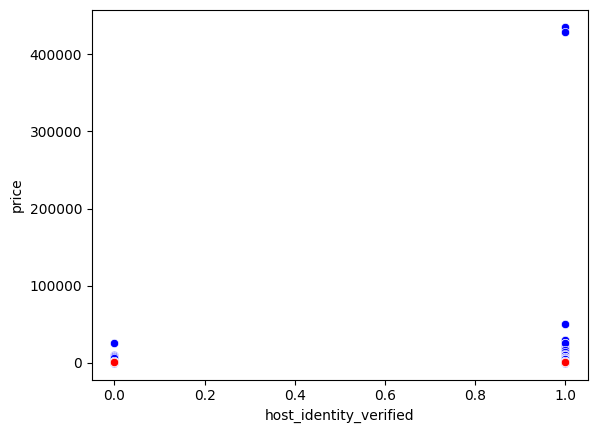

In [27]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=mexico_private_room4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=mexico_private_room4)


In [28]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

8.178672869063597e-06

In [29]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0028598379095787223

In [30]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_private_room4.corr()
Corr_Factors


,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_identity_verified,instant_bookable,host_is_superhost
Predicciones,1.000000,0.102577,0.096626,0.045334,0.008263,0.002860,0.011444,0.024609,0.011703,-0.004009,...,0.004041,0.016893,0.006670,0.002528,0.003456,0.011487,0.028024,1.000000,0.097467,0.003605
Unnamed: 0,0.102577,1.000000,0.935519,0.461062,0.054592,-0.007592,0.123097,0.017907,0.073505,-0.057511,...,-0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.102577,0.223907,-0.010531
id,0.096626,0.935519,1.000000,0.414733,0.037992,-0.005643,0.101712,0.001985,0.069465,-0.055802,...,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.096626,0.202706,-0.011514
host_id,0.045334,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,-0.010091,...,-0.083707,-0.002756,-0.020969,-0.061844,-0.029476,-0.020455,0.120174,0.045334,0.108508,-0.085795
host_acceptance_rate,0.008263,0.054592,0.037992,0.071653,1.000000,-0.012018,0.045940,-0.030873,0.071861,-0.028578,...,-0.025681,-0.072582,-0.095276,-0.017431,-0.055797,-0.079178,0.146332,0.008263,0.000970,0.248486
price,0.002860,-0.007592,-0.005643,0.004901,-0.012018,1.000000,-0.010086,-0.010823,0.018599,-0.011392,...,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,-0.011681,0.002860,-0.013786,-0.020353
latitude,0.011444,0.123097,0.101712,0.113206,0.045940,-0.010086,1.000000,0.067917,0.067812,-0.032024,...,-0.085069,-0.080734,-0.044939,-0.056565,-0.053265,-0.051090,0.106904,0.011444,0.020800,-0.026725
longitude,0.024609,0.017907,0.001985,0.017153,-0.030873,-0.010823,0.067917,1.000000,-0.008618,-0.018909,...,-0.022928,-0.044392,-0.016458,0.001300,-0.010071,-0.024784,0.001281,0.024609,0.000595,-0.006967
accommodates,0.011703,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,-0.008618,1.000000,0.084597,...,-0.060714,-0.026843,-0.047046,-0.045523,-0.014735,-0.034789,0.061394,0.011703,0.027081,-0.004356
bathrooms,-0.004009,-0.057511,-0.055802,-0.010091,-0.028578,-0.011392,-0.032024,-0.018909,0.084597,1.000000,...,-0.034109,-0.019639,-0.009257,-0.011923,0.002270,-0.026342,-0.055402,-0.004009,-0.010986,-0.089928


In [31]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_identity_verified,instant_bookable,host_is_superhost
Predicciones,1.000000,0.102577,0.096626,0.045334,0.008263,0.002860,0.011444,0.024609,0.011703,0.004009,...,0.004041,0.016893,0.006670,0.002528,0.003456,0.011487,0.028024,1.000000,0.097467,0.003605
Unnamed: 0,0.102577,1.000000,0.935519,0.461062,0.054592,0.007592,0.123097,0.017907,0.073505,0.057511,...,0.018109,0.050822,0.050528,0.004989,0.067522,0.077599,0.242896,0.102577,0.223907,0.010531
id,0.096626,0.935519,1.000000,0.414733,0.037992,0.005643,0.101712,0.001985,0.069465,0.055802,...,0.002588,0.065244,0.069697,0.029322,0.077919,0.097988,0.222589,0.096626,0.202706,0.011514
host_id,0.045334,0.461062,0.414733,1.000000,0.071653,0.004901,0.113206,0.017153,0.116237,0.010091,...,0.083707,0.002756,0.020969,0.061844,0.029476,0.020455,0.120174,0.045334,0.108508,0.085795
host_acceptance_rate,0.008263,0.054592,0.037992,0.071653,1.000000,0.012018,0.045940,0.030873,0.071861,0.028578,...,0.025681,0.072582,0.095276,0.017431,0.055797,0.079178,0.146332,0.008263,0.000970,0.248486
price,0.002860,0.007592,0.005643,0.004901,0.012018,1.000000,0.010086,0.010823,0.018599,0.011392,...,0.004176,0.021763,0.003548,0.000176,0.019506,0.008464,0.011681,0.002860,0.013786,0.020353
latitude,0.011444,0.123097,0.101712,0.113206,0.045940,0.010086,1.000000,0.067917,0.067812,0.032024,...,0.085069,0.080734,0.044939,0.056565,0.053265,0.051090,0.106904,0.011444,0.020800,0.026725
longitude,0.024609,0.017907,0.001985,0.017153,0.030873,0.010823,0.067917,1.000000,0.008618,0.018909,...,0.022928,0.044392,0.016458,0.001300,0.010071,0.024784,0.001281,0.024609,0.000595,0.006967
accommodates,0.011703,0.073505,0.069465,0.116237,0.071861,0.018599,0.067812,0.008618,1.000000,0.084597,...,0.060714,0.026843,0.047046,0.045523,0.014735,0.034789,0.061394,0.011703,0.027081,0.004356
bathrooms,0.004009,0.057511,0.055802,0.010091,0.028578,0.011392,0.032024,0.018909,0.084597,1.000000,...,0.034109,0.019639,0.009257,0.011923,0.002270,0.026342,0.055402,0.004009,0.010986,0.089928


<Axes: >

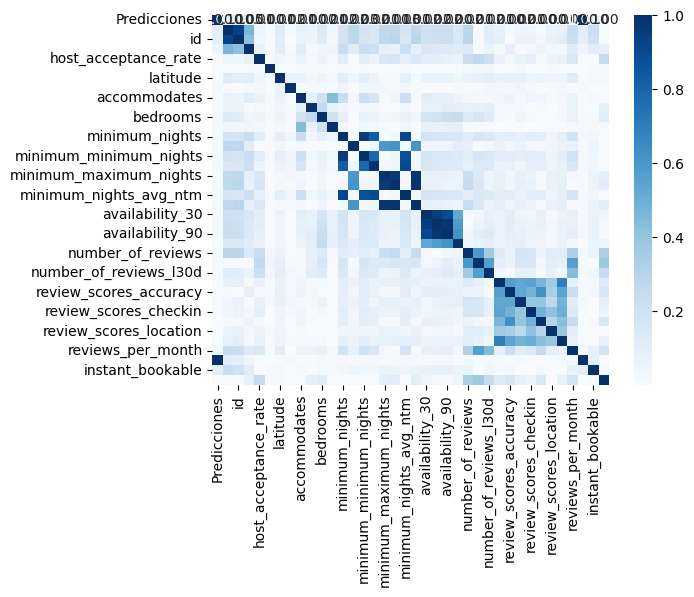

In [32]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs instant_bookable”


In [34]:
mexico_private_room5 = pd.read_csv("mexico_private_room1.csv")

In [35]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_private_room5[['instant_bookable']]
Vars_Dep=mexico_private_room5['price']


In [36]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-189.35713097]),
 'rank_': 1,
 'singular_': array([45.3940301]),
 'intercept_': 1068.3699400299847}

Modelo matemático:y=--189.35713097*1068.3699400299847

In [37]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0001900483713518364

In [38]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_private_room5[['instant_bookable']])
y_pred

array([1068.36994003, 1068.36994003, 1068.36994003, ...,  879.01280906,
        879.01280906,  879.01280906])

In [39]:
#Insertamos la columna de predicciones en el Dataframe
mexico_private_room5.insert(0, 'Predicciones', y_pred)
mexico_private_room5


,Predicciones,Unnamed: 0,id,host_id,host_acceptance_rate,price,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_identity_verified,instant_bookable,host_is_superhost
0,1068.369940,0,1.316100e+05,647454,100,3633.0,19.354160,-99.164880,2.0,1.5,...,4.79,4.86,5.00,4.83,4.91,4.82,1.74,1,0,0
1,1068.369940,1,1.711090e+05,816295,78,335.0,19.396750,-99.175810,2.0,1.0,...,4.87,4.61,4.98,4.95,4.97,4.81,0.84,1,0,1
2,1068.369940,2,1.013504e+06,1664327,100,384.0,19.340340,-99.183450,1.0,1.5,...,4.90,4.92,4.92,4.94,4.92,4.89,0.54,1,0,1
3,1068.369940,3,1.051636e+06,22366411,100,947.0,19.405920,-99.169100,1.0,1.0,...,4.60,4.97,4.97,4.77,4.93,4.73,0.22,1,0,0
4,1068.369940,4,1.066945e+06,5870021,75,1200.0,19.354450,-99.162510,2.0,1.0,...,4.94,4.97,4.96,4.91,4.97,4.94,1.15,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,879.012809,8688,1.250000e+18,546574784,100,262.0,19.400000,-99.137099,2.0,2.0,...,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1,0
8689,879.012809,8689,1.250000e+18,67472234,100,488.0,19.387329,-99.200000,4.0,1.0,...,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1,1
8690,879.012809,8690,1.250000e+18,596009321,100,2800.0,19.432687,-99.197736,2.0,1.0,...,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1,0
8691,879.012809,8691,1.250000e+18,596009321,100,2700.0,19.432687,-99.197736,2.0,1.0,...,4.79,4.86,5.00,4.83,5.00,5.00,1.74,1,1,0


<Axes: xlabel='instant_bookable', ylabel='price'>

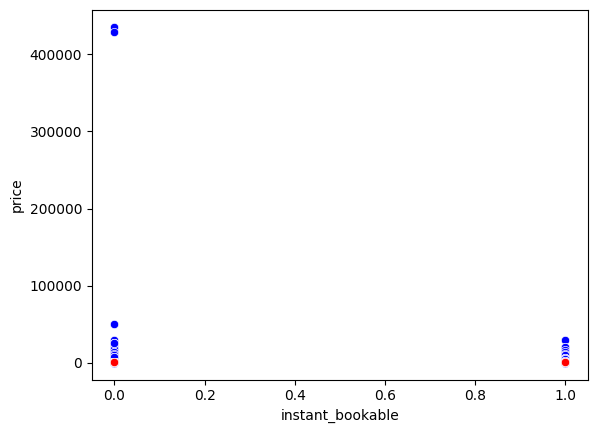

In [40]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=mexico_private_room5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=mexico_private_room5)


In [41]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0001900483713518364

In [42]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.01378580325377656

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_private_room5.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

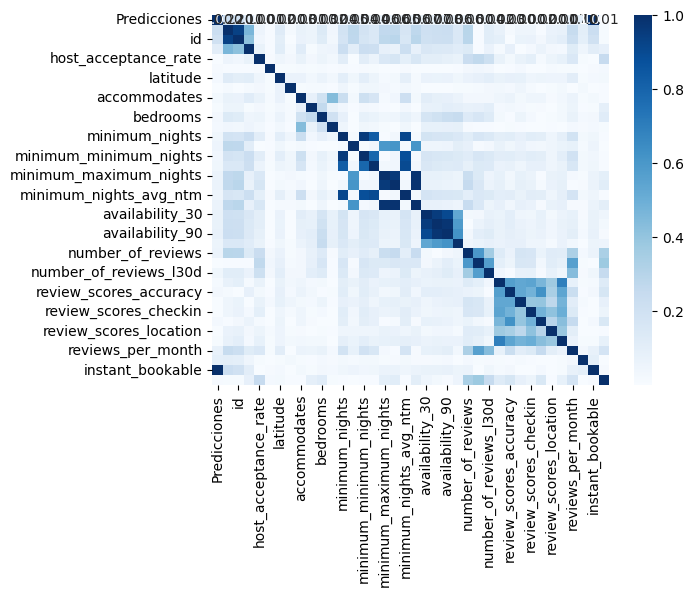

In [45]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“Price vs property_type”


In [56]:
mexico_private_room6 = pd.read_csv("mexico_private_room1.csv")

In [57]:
mexico_private_room6['property_type'] = mexico_private_room6['property_type'].astype('category').cat.codes


In [58]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=mexico_private_room6[['property_type']]
Vars_Dep=mexico_private_room6['price']


In [59]:
# Ver categorías únicas de room_type
mexico_private_room6['property_type'].unique()

array([ 0, 26, 17,  8, 15, 28, 33,  2, 37, 16, 22, 31, 13, 35,  5, 38, 14,
        4, 36, 18, 12, 11, 20, 10, 34,  1,  9, 29, 24, 32, 21, 25,  3,  7,
       30,  6, 19, 27, 23], dtype=int8)

In [60]:
mexico_private_room6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8693 non-null   int64  
 1   id                           8693 non-null   float64
 2   host_id                      8693 non-null   int64  
 3   host_acceptance_rate         8693 non-null   int64  
 4   property_type                8693 non-null   int8   
 5   price                        8693 non-null   float64
 6   latitude                     8693 non-null   float64
 7   longitude                    8693 non-null   float64
 8   accommodates                 8693 non-null   float64
 9   bathrooms                    8693 non-null   float64
 10  bedrooms                     8693 non-null   float64
 11  beds                         8693 non-null   float64
 12  minimum_nights               8693 non-null   int64  
 13  maximum_nights    

In [61]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-6.57712068]),
 'rank_': 1,
 'singular_': array([815.85294724]),
 'intercept_': 1130.2658719662181}

Modelo matemático:y=-6.57712068* 1130.2658719662181

In [62]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

7.40625625632596e-05

In [63]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=mexico_private_room6[['property_type']])
y_pred

array([1130.26587197,  959.26073431, 1018.45482042, ...,  880.33528617,
        880.33528617,  880.33528617])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
mexico_private_room6.insert(0, 'Predicciones', y_pred)
mexico_private_room6


<Axes: xlabel='property_type', ylabel='price'>

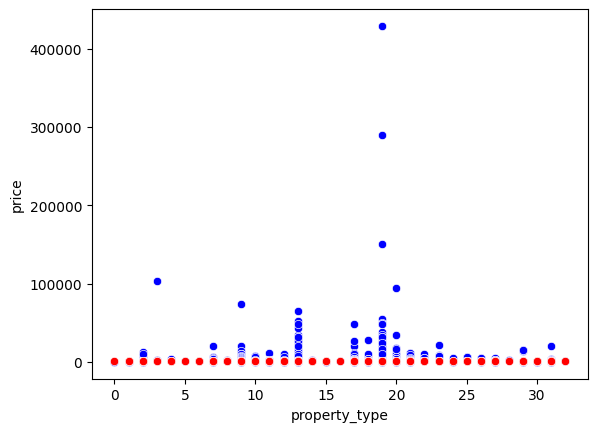

In [ ]:
sns.scatterplot(x='property_type', y='price', color="blue", data=mexico_private_room6)
sns.scatterplot(x='property_type', y='Predicciones', color="red", data=mexico_private_room6)

In [202]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

9.02116579371004e-06

In [203]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.003003525560688645

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=mexico_private_room6.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

<Axes: >

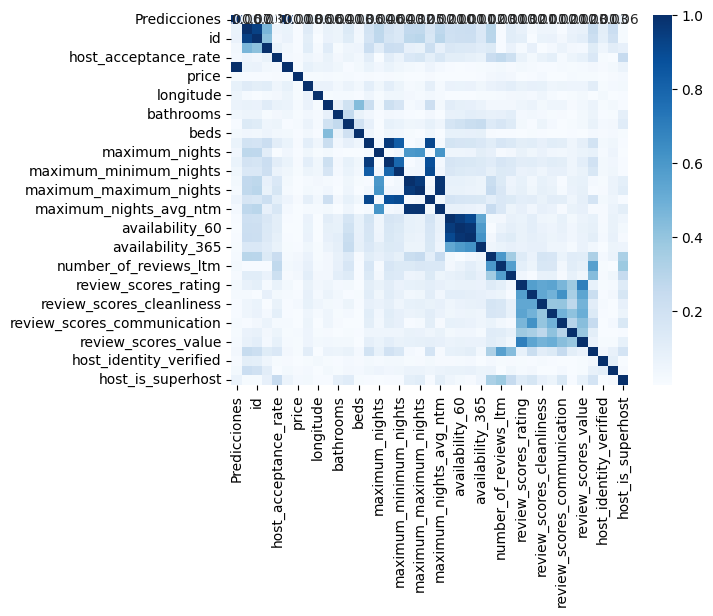

In [67]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map